In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_table('galway_rentals.txt')
df.head()

,price_per_month,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms,type,ber,balcony,floor,heating
0,3700,1.112343,2.458528,0.663391,3.046377,5,3,house,exempt,no,ground,central
1,3640,1.045924,2.687242,1.013547,2.627561,6,3,house,b3,no,ground,central
2,2950,1.876834,2.365351,0.889952,4.098964,4,2,house,c1,no,ground,central
3,2825,1.739580,1.340990,0.973981,4.275886,3,2,apartment,d1,no,second,electric
4,2800,2.446769,1.037478,1.917976,4.984487,4,3,house,c1,no,ground,central


In [ ]:
y = df['price_per_month']

In [ ]:
df = df.drop(['price_per_month'],axis=1)


In [ ]:
df['type'].value_counts()

apartment    233
house        140
townhouse     12
studio        10
Name: type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   distance_eyre_square  395 non-null    float64
 1   distance_salthill     395 non-null    float64
 2   distance_nuig         395 non-null    float64
 3   distance_gmit         395 non-null    float64
 4   num_bedrooms          395 non-null    int64  
 5   num_bathrooms         395 non-null    int64  
 6   type                  395 non-null    object 
 7   ber                   395 non-null    object 
 8   balcony               395 non-null    object 
 9   floor                 395 non-null    object 
 10  heating               395 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 34.1+ KB


In [ ]:
df.describe()

,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.273589,2.629011,2.301768,3.570564,2.498734,1.731646
std,1.461875,1.653713,1.458814,1.860081,1.050440,0.718774
min,0.007512,0.099173,0.311939,0.209452,1.000000,1.000000
25%,1.020116,1.350377,1.117011,2.237932,2.000000,1.000000
50%,2.091903,2.339826,1.765705,3.252499,2.000000,2.000000
75%,3.051256,3.580287,3.298584,4.729937,3.000000,2.000000
max,5.586384,7.005967,6.308555,8.135066,6.000000,3.000000


In [ ]:
col = ['type','ber','balcony','floor','heating']




In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# for each_col in col:
#   le = LabelEncoder()
#   df[each_col] = le.fit_transform(df[each_col])

In [ ]:
onehotencoder = OneHotEncoder()
df_type = onehotencoder.fit_transform(df[['type']]).toarray()

In [ ]:
df_type.shape

(395, 4)

In [ ]:
onehotencoder = OneHotEncoder()
df_ber = onehotencoder.fit_transform(df[['ber']]).toarray()

In [ ]:
onehotencoder = OneHotEncoder()
df_bal = onehotencoder.fit_transform(df[['balcony']]).toarray()

In [ ]:
onehotencoder = OneHotEncoder()
df_floor = onehotencoder.fit_transform(df[['floor']]).toarray()

In [ ]:
onehotencoder = OneHotEncoder()
df_heat = onehotencoder.fit_transform(df[['heating']]).toarray()

In [ ]:
df_new = df.drop(['type','ber','balcony','floor','heating'],axis=1)

In [ ]:


df_new.head()

,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms
0,1.112343,2.458528,0.663391,3.046377,5,3
1,1.045924,2.687242,1.013547,2.627561,6,3
2,1.876834,2.365351,0.889952,4.098964,4,2
3,1.739580,1.340990,0.973981,4.275886,3,2
4,2.446769,1.037478,1.917976,4.984487,4,3


In [ ]:
df_final = np.hstack((np.array(df_new),df_type,df_ber,df_bal,df_floor,df_heat))

In [ ]:
df_final.shape

(395, 33)

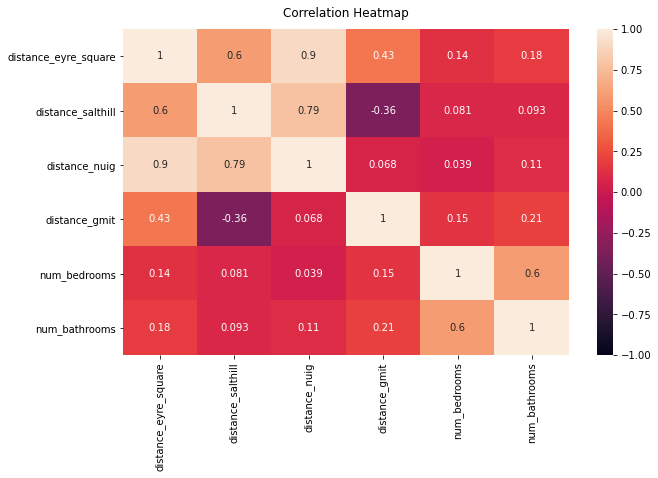

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# df_new = df_new.drop(['distance_gmit','distance_salthill'],axis=1)

In [ ]:
# df_new.head()

In [ ]:
# df_final = np.hstack((np.array(df_new),df_type,df_ber,df_bal,df_floor,df_heat))

In [ ]:
# # Create correlation matrix
# corr_matrix = df_new.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# df_new.drop(to_drop, axis=1, inplace=True)

In [ ]:
# df_new.head()

In [ ]:
# df_final = np.hstack((np.array(df_new),df_type,df_ber,df_bal,df_floor,df_heat))

In [ ]:
X = df_final

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df = scaler.fit_transform(X)


<AxesSubplot:>

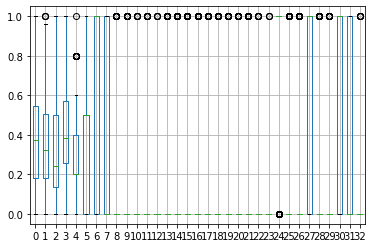

In [ ]:
pd.DataFrame(df).boxplot()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 33), (79, 33), (316,), (79,))

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()

In [ ]:
space = {}
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(lr, space, scoring='r2', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_train, y_train)

In [ ]:
result.best_estimator_,result.best_params_

(LinearRegression(normalize=True), {'fit_intercept': True, 'normalize': True})

In [ ]:
lr = LinearRegression(normalize=True,fit_intercept= True)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([1565., 1295., 1539., 1785., 1929., 1129., 1596., 1447.,  988.,
       1091., 1025., 1879., 1904., 1849., 1565., 2553., 1970., 1441.,
       1157., 1554., 1553., 1621., 1789., 1665., 1419., 2120., 1539.,
       1311., 2049., 1855., 1638., 1501., 1091., 1703., 1355., 1587.,
       2063., 1639., 1723., 1829., 2664., 1581., 1300., 1389., 1670.,
       1280., 1609.,  929., 1374., 1598., 1520., 1293., 2077., 1774.,
       2075., 2191., 1904., 1093., 1213., 1531., 1560., 1315., 2243.,
       1936., 1189., 2215., 1335., 1211., 1647., 1535., 1808., 2073.,
       1730., 1116., 1697., 1741., 1752., 1331., 1861.])

In [ ]:
print(lr.coef_)

[-4.14919058e-01 -2.93306879e+01 -5.17006605e+01 -1.20068115e+01
  3.03717304e+02  1.21413455e+02  4.40849080e+14  4.40849080e+14
  4.40849080e+14  4.40849080e+14 -2.60079880e+15 -2.60079880e+15
 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15
 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15
 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15 -2.60079880e+15
 -2.94383802e+15 -2.94383802e+15 -5.77273164e+14 -5.77273164e+14
 -5.77273164e+14 -5.77273164e+14 -2.34143810e+15 -2.34143810e+15
 -2.34143810e+15]


In [ ]:
print(lr.intercept_)

8022499006375779.0


In [ ]:
#calculate r squared value
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
#mae
mean_absolute_error(y_test,y_pred)

237.69620253164558

In [ ]:
#mse
mean_squared_error(y_test,y_pred)

110525.46835443038

In [ ]:
#rmse
np.sqrt(mean_squared_error(y_test,y_pred))

332.4537085887754

In [ ]:
#r2
r2_lin = r2_score(y_test, y_pred)
r2_lin

0.5885408380789494

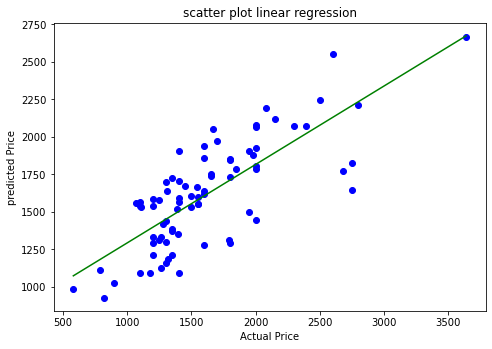

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test,y_pred, color='b')

ax.set_xlabel('Actual Price')
ax.set_ylabel('predicted Price')
ax.set_title('scatter plot linear regression')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color = 'green')
plt.show()


In [ ]:
# lasso = Lasso(random_state=0, max_iter=100000)
# alphas = np.logspace(-4, -0.5, 30)

# tuned_parameters = [{"alpha": alphas}]
# n_folds = 5

# results = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False,scoring='r2')
# # results.cv_results_
# results.fit(X_train, y_train)



In [ ]:
# pd.DataFrame(results.cv_results_)

In [ ]:
# cv_lasso pd.DataFrame(results.cv_results_)['mean_test_score']

In [ ]:
# results.estimator,results.best_params_

In [ ]:
# lasso = Lasso(max_iter=10000, random_state=0,alpha=0.31622776601683794)

In [ ]:
# lasso.fit(X_train, y_train)

In [ ]:
# Y_pred = lasso.predict(X_test)

In [ ]:
# print(lasso.coef_)

In [ ]:
# print(lasso.intercept_)

In [ ]:
#mae
# mean_absolute_error(y_test,Y_pred)

In [ ]:
#mse
# mean_squared_error(y_test,Y_pred)

In [ ]:
#rmse
# np.sqrt(mean_squared_error(y_test,Y_pred))

In [ ]:
#r2
# r2_lasso = r2_score(y_test, Y_pred)
# r2_lasso

In [ ]:
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(y_test,Y_pred, color='b')
# plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Y_pred, 1))(np.unique(y_test)), color = 'green')
# ax.set_xlabel('test')
# ax.set_ylabel('pred')
# ax.set_title('scatter plot')
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# scores_lasso = cross_val_score(lasso,
#                              X_train,
#                              y_train,
#                              cv=10,
#                              scoring='r2')

In [ ]:
scores_lin = cross_val_score(lr,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')

In [ ]:
# plt.plot(range(10), scores_lasso, label ="Lasso Regression")
# plt.plot(range(10), scores_lin, label ="Linear regression")
# plt.xlabel("Iterations")
# plt.ylabel("R2_Score")
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X_train, y_train)

In [ ]:
# y_pred = regr.predict(X_test)


In [ ]:
# #mae
# mean_absolute_error(y_test,y_pred)

# #mse
# mean_squared_error(y_test,y_pred)

# #rmse
# np.sqrt(mean_squared_error(y_test,y_pred))

# #r2
# r2_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
svr=SVR(kernel='linear')

In [ ]:
param_grid={
            'C': [1.1, 5.4, 170, 1001],
            'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7],
            'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]
        }

In [ ]:
results = GridSearchCV(svr, param_grid, cv=5, refit=False)
results.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1.1, 5.4, 170, 1001],
                         'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05,
                                     8, 0.2, 3, 2, 7],
                         'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]},
             refit=False)

In [ ]:
results.best_params_

{'C': 5.4, 'epsilon': 8, 'gamma': 0.7001}

In [ ]:
#vr= SVR(C= 1001, epsilon= 8, gamma= 0.7001)

In [ ]:
svr = SVR(C= 1001, epsilon= 5, gamma = 'auto')

In [ ]:
svr.fit(X_train,y_train)

SVR(C=1001, epsilon=5, gamma='auto')

In [ ]:
y_pred1 = svr.predict(X_test)

#mae
mean_absolute_error(y_test,y_pred1)

#mse
mean_squared_error(y_test,y_pred1)

#rmse
np.sqrt(mean_squared_error(y_test,y_pred1))

#r2
r2_score(y_test, y_pred1)

0.6366429881266082

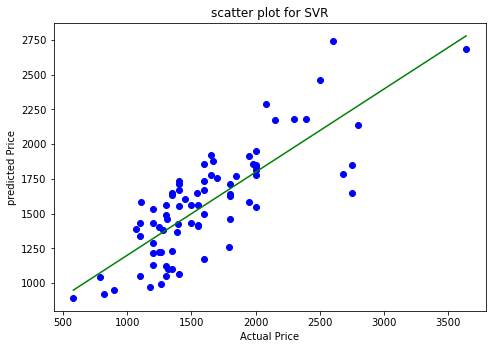

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test,y_pred1, color='b')

ax.set_xlabel('Actual Price')
ax.set_ylabel('predicted Price')
ax.set_title('scatter plot for SVR')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred1, 1))(np.unique(y_test)), color = 'green')
plt.show()

In [ ]:
#SVR
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred1))
print("MSE:",metrics.mean_squared_error(y_test,y_pred1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print("R2_score:",metrics.r2_score(y_test, y_pred1))
print("R:",np.sqrt(metrics.r2_score(y_test, y_pred1)))

MAE: 228.46566420890014
MSE: 97604.34967511732
RMSE: 312.4169484440902
R2_score: 0.6366429881266082
R: 0.797899108989732


In [ ]:
#LR
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2_score:",metrics.r2_score(y_test, y_pred))
print("R:",np.sqrt(metrics.r2_score(y_test, y_pred)))

MAE: 237.69620253164558
MSE: 110525.46835443038
RMSE: 332.4537085887754
R2_score: 0.5885408380789494
R: 0.7671641532807365


In [ ]:
#regr = svm.SVR(C=1.0, kernel='rbf', degree=3)

In [ ]:
#regr.fit(X_train, y_train)


In [ ]:
#ypred = regr.predict(X_test)

In [ ]:
#calculate r squared value
#from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
#mae
#mean_absolute_error(y_test,ypred)

In [ ]:
#mse
#mean_squared_error(y_test,ypred)

In [ ]:
#rmse
#np.sqrt(mean_squared_error(y_test,ypred))

In [ ]:
#r2
#r2_score(y_test, ypred)

In [ ]:
scores_lasso = cross_val_score(svr,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')

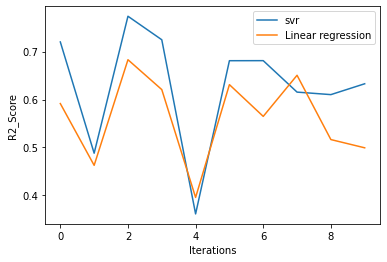

In [ ]:
plt.plot(range(10), scores_lasso, label ="svr")
plt.plot(range(10), scores_lin, label ="Linear regression")
plt.xlabel("Iterations")
plt.ylabel("R2_Score")
plt.legend()
plt.show()